In [11]:
import warnings
warnings.filterwarnings('ignore')
import os, inspect, sys

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
file: str = os.getcwd() + '/Data/train.xlsx'
savePath: str = os.getcwd()

skiprows: int = 0
header: list = [0]
sheet_name: str = "detailled"
groundtruth: str = 'Survived'
dropColumns: list = ['Cabin', 'Embarked', 'PassengerId', 'Ticket']

In [13]:
dataframe: pd.DataFrame = pd.read_excel(file, header=header, sheet_name=sheet_name, skiprows=skiprows)
dataframe.head()

PassengerId  Survived  Pclass First Name                    Name Civility  \
0          259         1       1       Ward                    Anna     Miss   
1          680         1       1    Cardeza   Thomas Drake Martinez       Mr   
2          738         1       1    Lesurer               Gustave J       Mr   
3           28         0       1    Fortune       Charles Alexander       Mr   
4           89         1       1    Fortune             Mabel Helen     Miss   

      Sex   Age  SibSp  Parch    Ticket      Fare  Log Fare        Cabin  \
0  female  35.0      0      0  PC 17755  512.3292  2.709549          NaN   
1    male  36.0      0      1  PC 17755  512.3292  2.709549  B51 B53 B55   
2    male  35.0      0      0  PC 17755  512.3292  2.709549         B101   
3    male  19.0      3      2     19950  263.0000  2.419956  C23 C25 C27   
4  female  23.0      3      2     19950  263.0000  2.419956  C23 C25 C27   

  Embarked  
0        C  
1        C  
2        C  
3        S  
4        S

In [14]:
dataframe.drop(dropColumns, axis=1, inplace=True)
dataframe.fillna(dataframe.mean(), inplace=True)

In [15]:
dataframe["Civility Code"] = dataframe["Civility"].astype('category').cat.codes
dataframe["Civility Code"] = dataframe["Civility Code"].astype('int64')
dataframe["Sex Code"] = dataframe["Sex"].astype('category').cat.codes
dataframe["Sex Code"] = dataframe["Sex Code"].astype('int64')
dataframe.head()

Survived  Pclass First Name                    Name Civility     Sex   Age  \
0         1       1       Ward                    Anna     Miss  female  35.0   
1         1       1    Cardeza   Thomas Drake Martinez       Mr    male  36.0   
2         1       1    Lesurer               Gustave J       Mr    male  35.0   
3         0       1    Fortune       Charles Alexander       Mr    male  19.0   
4         1       1    Fortune             Mabel Helen     Miss  female  23.0   

   SibSp  Parch      Fare  Log Fare  Civility Code  Sex Code  
0      0      0  512.3292  2.709549              8         0  
1      0      1  512.3292  2.709549             11         1  
2      0      0  512.3292  2.709549             11         1  
3      3      2  263.0000  2.419956             11         1  
4      3      2  263.0000  2.419956              8         0

In [16]:
print('Data describe:')
dataframe.describe()

Data describe:


Survived      Pclass         Age       SibSp       Parch        Fare  \
count  891.000000  891.000000  891.000000  891.000000  891.000000  891.000000   
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208   
std      0.486592    0.836071   13.002015    1.102743    0.806057   49.693429   
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000   
25%      0.000000    2.000000   22.000000    0.000000    0.000000    7.910400   
50%      0.000000    3.000000   29.699118    0.000000    0.000000   14.454200   
75%      1.000000    3.000000   35.000000    1.000000    0.000000   31.000000   
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200   

         Log Fare  Civility Code    Sex Code  
count  891.000000     891.000000  891.000000  
mean     1.256781      10.241302    0.647587  
std      0.435553       1.830798    0.477990  
min      0.000000       0.000000    0.000000  
25%      0.898198       8.000000    0.000000  
50%      1.159994      11.000000    1.000000  
75%      1.491362      11.000000    1.000000  
max      2.709549      16.000000    1.000000

In [17]:
missing = dataframe.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)

In [18]:
print("No missing values") if missing.empty else missing.plot.bar()

No missing values


## Distribution of variables

In [20]:
def plot_distribution(df: pd.DataFrame):
    dfnbr = [f for f in df.columns if df.dtypes[f] != 'object']
    f = pd.melt(df, value_vars=dfnbr)
    g = sns.FacetGrid(f, col="variable", col_wrap=4, sharex=False, sharey=False)
    g = g.map(sns.distplot, "value")

In [21]:
plot_distribution(dataframe)

## For each variables, what is the mean value of survive ?

In [22]:
dataframe[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363

In [23]:
dataframe[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

Sex  Survived
0  female  0.742038
1    male  0.188908

In [24]:
dataframe[['Parch', 'Survived']].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

Parch  Survived
3      3  0.600000
1      1  0.550847
2      2  0.500000
0      0  0.343658
5      5  0.200000
4      4  0.000000
6      6  0.000000

In [25]:
dataframe[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

SibSp  Survived
1      1  0.535885
2      2  0.464286
0      0  0.345395
3      3  0.250000
4      4  0.166667
5      5  0.000000
6      8  0.000000

In [26]:
dataframe[["Civility", "Survived"]].groupby(['Civility'], as_index=False).mean().sort_values(by='Survived', ascending=False)

Civility  Survived
16  theCountess  1.000000
9          Mlle  1.000000
15          Sir  1.000000
13           Ms  1.000000
5          Lady  1.000000
10          Mme  1.000000
12          Mrs  0.792000
8          Miss  0.697802
7        Master  0.575000
1           Col  0.500000
6         Major  0.500000
3            Dr  0.428571
11           Mr  0.156673
4      Jonkheer  0.000000
14          Rev  0.000000
2           Don  0.000000
0          Capt  0.000000

## Distribution of variable function of groundtruth 

In [27]:
def dataset_distribution_gnd(df: pd.DataFrame, target: str):
    for column in df.columns:
        if (column != target and (df[column].dtype == np.float64 or df[column].dtype == np.int64)):
            facet = sns.FacetGrid(df, hue=target, aspect=4)
            facet.map(sns.kdeplot, column, shade=True)
            facet.set(xlim=(0, df[column].max()))
            facet.add_legend()

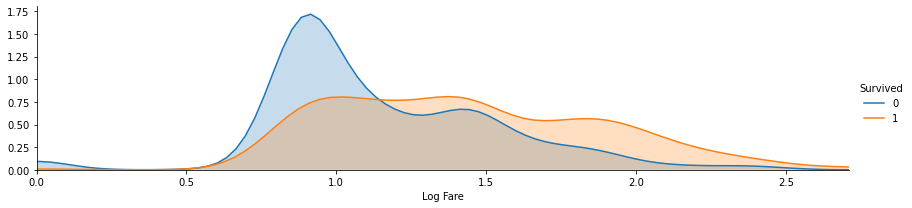

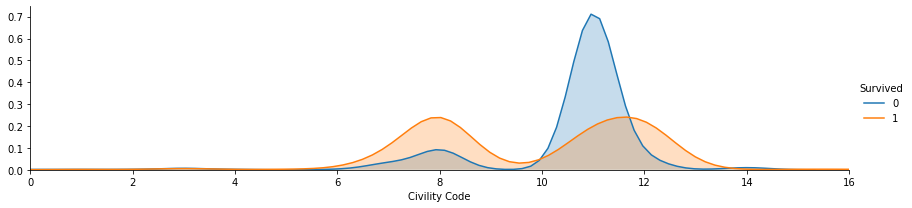

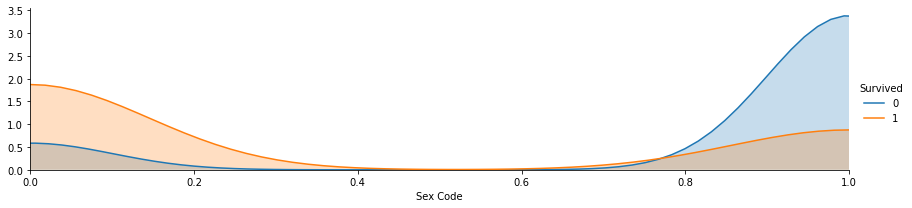

In [28]:
dataset_distribution_gnd(dataframe, groundtruth)

In [29]:
def correlation_map(df: pd.DataFrame, annotation: bool=True):
    corr = df.corr()
    _, ax = plt.subplots(figsize=(16, 10))
    cmap = sns.diverging_palette(10, 150, as_cmap=True)

    if annotation:
        _ = sns.heatmap(
            corr,
            cmap=cmap,
            square=True,
            cbar_kws={'shrink': .9},
            ax=ax,
            annot=True,
            annot_kws={'fontsize': 12}
        )
    else:
        _ = sns.heatmap(
            corr,
            cmap=cmap,
            square=True,
            cbar_kws={'shrink': .9},
            ax=ax,
            annot=True,
            annot_kws={'fontsize': 0}
        )

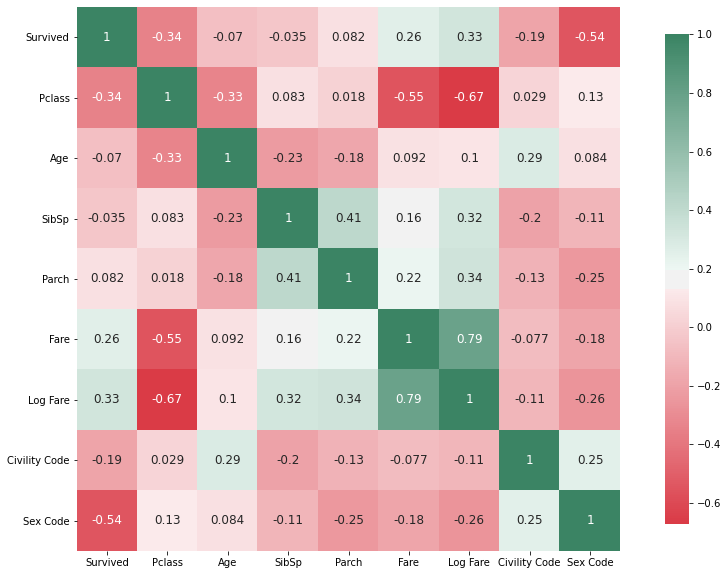

In [30]:
correlation_map(dataframe)

In [31]:
def show_correlation_gnd(df: pd.DataFrame, groundtruth: str=""):
    corr = df.corr()
    return abs(corr[groundtruth]).sort_values()

In [32]:
show_correlation_gnd(dataframe, groundtruth)

SibSp            0.035322
Age              0.069809
Parch            0.081629
Civility Code    0.193635
Fare             0.257307
Log Fare         0.331805
Pclass           0.338481
Sex Code         0.543351
Survived         1.000000
Name: Survived, dtype: float64

# Study of the Civility of Ship Lead and VIP

In [33]:
CivilityDataframe: pd.DataFrame = dataframe[dataframe['Civility Code'].isin([0, 15, 13, 10, 5, 16, 2, 4, 6, 9, 1, 14, 3])]
CivilityDataframe: pd.DataFrame = CivilityDataframe[['Pclass', 'Age', 'Fare', 'Sex' ,'Civility', 'Survived']]

In [34]:
CivilityDataframe[['Civility', 'Survived']].groupby(['Civility'], as_index=False).mean().sort_values(by='Survived', ascending=False)

Civility  Survived
5          Lady  1.000000
7          Mlle  1.000000
8           Mme  1.000000
9            Ms  1.000000
11          Sir  1.000000
12  theCountess  1.000000
1           Col  0.500000
6         Major  0.500000
3            Dr  0.428571
0          Capt  0.000000
2           Don  0.000000
4      Jonkheer  0.000000
10          Rev  0.000000

In [35]:
CivilityDataframe[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

Sex  Survived
0  female      1.00
1    male      0.25

In [36]:
CivilityDataframe[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

Pclass  Survived
0       1  0.611111
1       2  0.111111